In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from scipy.io import loadmat

In [2]:
data_at8 = loadmat('Données/data_at8.mat') 

data=data_at8['data']


X=data[:,1:14]

y=data[:,14]



In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) 

In [4]:
# Les réseaux de neurones apprennent mieux si les données sont préalablement normalisées. 
#Il faut bien sûr veiller à ce que cette même normalisation soit appliquée aux données de test.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit (X_train)
X_trainN = scaler.transform(X_train)
X_testN = scaler.transform(X_test)


In [5]:
#J'arrondis les valeur du label pour les avoir en entier afin de pouvoir l'utiliser dans le réseau de neurones de scikit-learn
y_train=np.round(y_train).astype(int)
y_test=np.round(y_test).astype(int)

In [6]:




# On définit les nombres de neurones dans les couches cachées

nbN1=20; nbN2=20; nbN3=20
HL = (nbN1, nbN2, nbN3)

# On crée et configurer le réseau de neurones
mlp = MLPClassifier(hidden_layer_sizes=HL, solver='lbfgs', learning_rate_init=0.05, momentum=0.9, random_state=5)

# On entraîne le réseau de neurones
mlp.fit(X_trainN, y_train)

# On effectue une prédiction sur les données de test
y_pred = mlp.predict(X_testN)

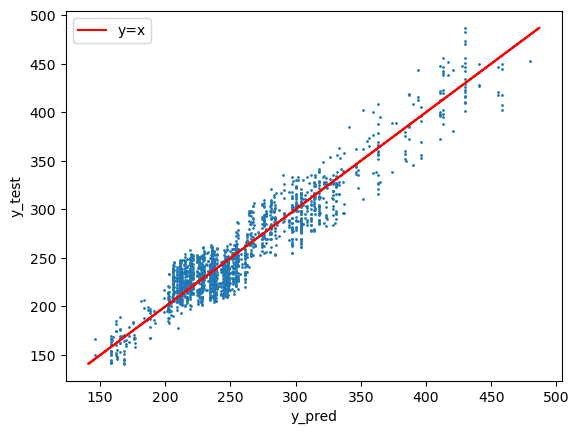

In [7]:
z=y_test
plt.scatter(y_pred,y_test,s=1)
plt.plot(z,y_test, color='r', label='y=x')
plt.ylabel('y_test')
plt.xlabel('y_pred')
plt.legend()
plt.show()

**Etude de l'influance des entrées sur la sortie**

In [8]:
def fonctionMTM(X,k):
    L=X.shape[1]

    #calcul de la moyenne par colonne de X
    mean_X = np.mean(X, axis=0)
    
    #Création de la matrice Mat_moyenne en répétant la moyenne
    Mat_moyenne = np.tile(mean_X, (2*L, 1))

    # Copie de Mat_moyenne dans MTM
    MTM = np.copy(Mat_moyenne)

    # Création du vecteur T
    T = np.arange(1, 2*L + 1)

    # Calcul de l'écart-type de la colonne k de X
    Delta = np.std(X[:, k])

    # Calcul de la nouvelle série de valeurs dans le vecteur DS
    DS = Delta * (T - L) / L
    # Mise à jour de la colonne k de MTM avec les valeurs de DS
    MTM[:, k] += DS 
    return MTM

Construction des 13 matrices   MTM

In [9]:
Matrices=[]
for i in range(X.shape[1]) :   
    MTM= fonctionMTM(X,i)

    Matrices.append(MTM)

Simulation de notre modéle avec chacune des matrices MTM

In [10]:
y_pred_hat=[]

var=[]

for k in range(13):

     
    y_pred_MTM= mlp.predict(scaler.transform(Matrices[k]))

    y_pred_hat.append(y_pred_MTM)

    var_k=np.std(y_pred_hat[k])/np.std(X[:,k])

    var.append(var_k)

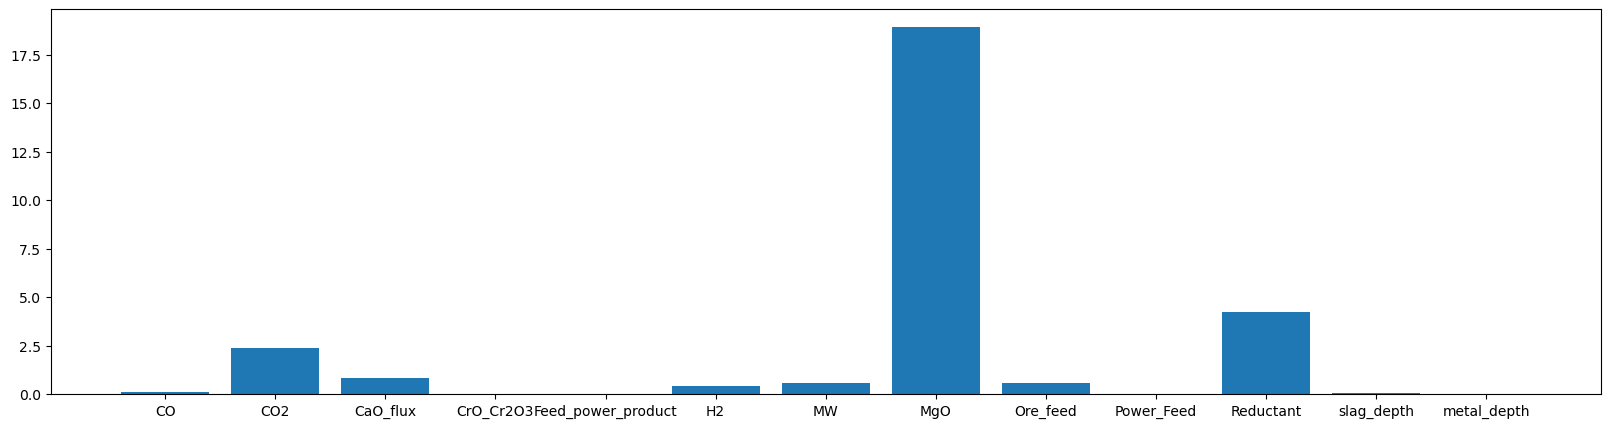

In [11]:
variables=['CO','CO2','CaO_flux','CrO_Cr2O3','Feed_power_product','H2','MW','MgO','Ore_feed','Power_Feed',
'Reductant', 'slag_depth','metal_depth']
fig=plt.figure(1, figsize=(20,5))
plt.bar(variables,var)

plt.show()
